<a href="https://colab.research.google.com/github/natandias/minicursoML/blob/master/minicurso_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA SCIENCE

## Importando dataset

In [8]:
import pandas as pd
uri = "https://bitbucket.org/pamela_m_rezende/curso-ml/raw/9e417193f0e1a2153aee139fdcf4e60a76e2165f/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


## Eliminando coluna desnecessária

In [12]:
dados = pd.read_csv(uri, index_col=0) # coluna unnamed foi eliminada
dados.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


## Printando info sobre os dados

In [102]:
print(f"Tamanho dos dados: {dados.shape}")
print ("Quantidade de linhas no arquivo: ", dados.shape[0]) # retorna quantidade de linhas
print("Quantidade de colunas no arquivo: ", dados.shape[1]) # retorna quantidade de colunas

Tamanho dos dados: (9998, 4)
Quantidade de linhas no arquivo:  9998
Quantidade de colunas no arquivo:  4


## Análise estatísca sobre os dados

In [22]:
dados.describe() # realiza analise estatistica em cima dos dados

,mileage_per_year,model_year,price
count,10000.000000,10000.00000,10000.000000
mean,14183.391200,2004.14420,64842.373698
std,5008.571422,4.68758,25250.592393
min,363.000000,1998.00000,-840.360000
25%,10474.750000,2000.00000,44796.375000
50%,13418.500000,2003.00000,65225.685000
75%,17176.750000,2007.00000,85111.237500
max,39572.000000,2017.00000,118929.720000


## Eliminando linhas onde o valor da coluna é menor que 0

In [23]:
dados[dados.price<0] # retorna linhas em que a coluna price possui valor menor que 0

,mileage_per_year,model_year,price,sold
4200,17000,1998,-270.77,yes
4796,13277,1998,-840.36,yes


In [24]:
dados = dados.drop([4200, 4796], axis=0) # elimina linhas que estão presentes os valores 4200 e 4796
dados[dados.price<0]

,mileage_per_year,model_year,price,sold


In [25]:
dados.describe() # perceba que o minimo da coluna price voltou ao normal

,mileage_per_year,model_year,price
count,9998.000000,9998.000000,9998.000000
mean,14183.200140,2004.145429,64855.455902
std,5008.984984,4.687243,25236.167514
min,363.000000,1998.000000,1757.970000
25%,10474.250000,2000.000000,44807.537500
50%,13418.500000,2003.000000,65227.910000
75%,17178.250000,2007.000000,85115.852500
max,39572.000000,2017.000000,118929.720000


## Renomeando as colunas

In [29]:
renomear = ["milhas_por_ano", "ano_modelo", "preco", "vendido"]
dados.columns = renomear
dados.head()

,milhas_por_ano,ano_modelo,preco,vendido
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


## Adicionando e realizando operações com colunas

In [32]:
from datetime import datetime

ano_atual = datetime.today().year
# cria uma nova coluna e atribui a ela o resultado da função aplicado a todos os elementos da coluna ano_modelo
dados['idade_do_modelo'] = ano_atual - dados.ano_modelo 
dados.head()

,milhas_por_ano,ano_modelo,preco,vendido,idade_do_modelo
0,21801,2000,30941.02,yes,19
1,7843,1998,40557.96,yes,21
2,7109,2006,89627.50,no,13
3,26823,2015,95276.14,no,4
4,7935,2014,117384.68,yes,5


In [36]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,milhas_por_ano,ano_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,21801,2000,30941.02,yes,19,35085.22134
1,7843,1998,40557.96,yes,21,12622.05362
2,7109,2006,89627.50,no,13,11440.79806
3,26823,2015,95276.14,no,4,43167.32682
4,7935,2014,117384.68,yes,5,12770.11290


## Eliminando coluna

In [41]:
dados = dados.drop(columns = ['milhas_por_ano', 'ano_modelo'], axis=1) # exclui as colunas que não são insteressantes
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,yes,19,35085.22134
1,40557.96,yes,21,12622.05362
2,89627.50,no,13,11440.79806
3,95276.14,no,4,43167.32682
4,117384.68,yes,5,12770.11290


## Importando bibliotecas de gráficos

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot') # estilo de gráfico

## Gráfico da quantidade de modelos por idade

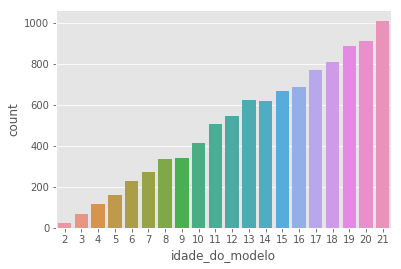

In [44]:
sns.countplot(x="idade_do_modelo", data=dados)

## Gráfico da quantidade de carros vendidos ou não

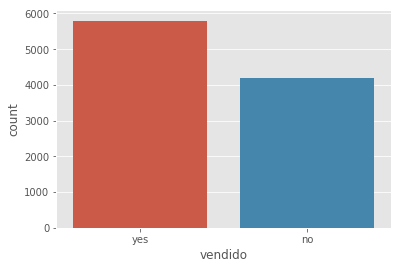

In [45]:
sns.countplot(x="vendido", data=dados)

## Gráfico da quantidade de vendidos por preço e km rodados

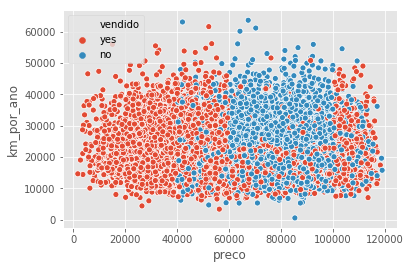

In [48]:
sns.scatterplot(x="preco", y="km_por_ano", hue="vendido", data=dados)

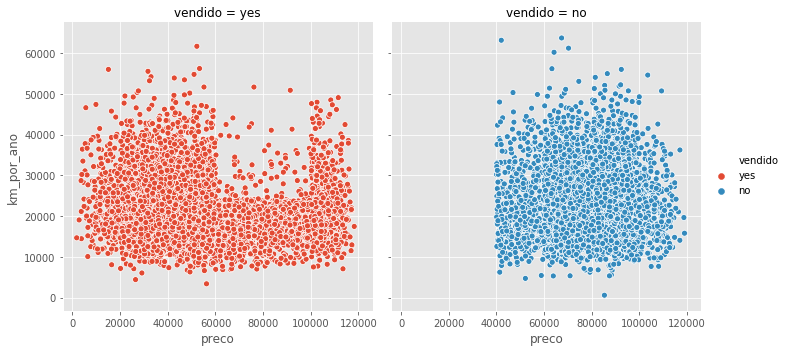

In [51]:
sns.relplot(x="preco", y="km_por_ano", hue="vendido", col="vendido", data=dados)

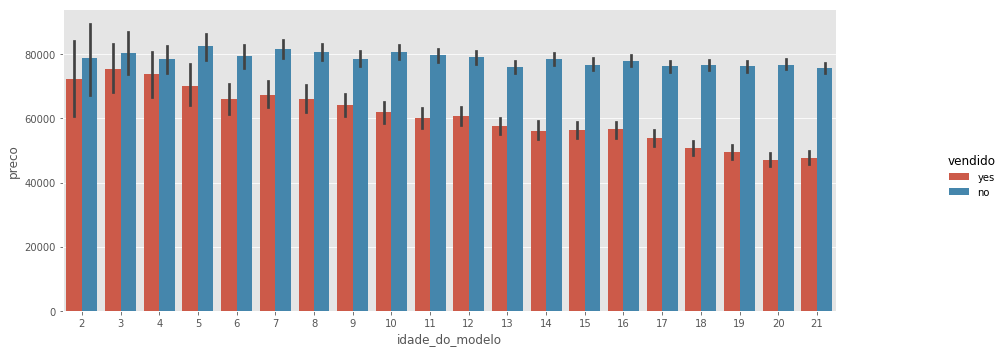

In [53]:
g = sns.catplot(x="idade_do_modelo", y="preco", hue="vendido", kind="bar", data=dados)
g.fig.set_size_inches(16, 5)

# MACHINE LEARNING

## Importando bibliotecas

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

## Separação do dataset de treino e dataset de teste

In [61]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]
treino_x, teste_x, treino_y, teste_y = train_test_split(
  x,
  y,
  test_size = 0.30,
  stratify = y
)
print(f"Treinaremos com {len(treino_x)} e testaremos com {len(teste_x)} ")

Treinaremos com 6998 e testaremos com 3000 


## Classificador aleatório

In [101]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)

acuracia_dummy = dummy_stratified.score(teste_x, teste_y) * 100
print(f"A acurácia do dummy stratified foi {acuracia_dummy :.2f}%")

A acurácia do dummy stratified foi 53.20%


## Classificador linear

In [97]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia_linear = accuracy_score(teste_y, previsoes) * 100

print(f"A acurácia foi {acuracia_linear:.2f}")

A acurácia foi 62.27


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Classificador SVC

In [109]:
from sklearn.svm import SVC

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia_svm = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi {acuracia_svm:.2f} %")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


A acurácia foi 58.00 %


## Árvore classificadora

In [173]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia_arvore = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi {acuracia_arvore:.2f}%")

A acurácia foi 78.97%


## Instalando biblioteca externa (graphviz)

In [148]:
!pip install graphviz==0.10

  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


## Visualizando árvore de classificação

In [0]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, 
                           rounded=True, feature_names=features,
                           class_names = ["no", "yes"])
grafico = graphviz.Source(dot_data)
grafico

## Classificador por Coleções

### Boost

In [172]:
from xgboost import XGBClassifier

modelo = XGBClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia_boost = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi {acuracia_boost:.2f}%")

A acurácia foi 78.67%


In [0]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'min_child_weight': [1, 5, 10],
    'max_depth': [3, 7, 6]
}
grid = GridSearchCV(XGBClassifier(), parametros, refit=True, verbose=3)
grid.fit(treino_x, treino_y)

In [188]:
print(grid.best_params_)
print(grid.best_estimator_)

{'max_depth': 3, 'min_child_weight': 1}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [193]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'min_child_weight': [1, 5, 10],
    'max_depth': [3, 7, 6],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid = GridSearchCV(XGBClassifier(), parametros, refit=True, verbose=3)
grid.fit(treino_x, treino_y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.782, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.781, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.771, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.783, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.779, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.773, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.782, total=   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.781, total=   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 


[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  5.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 7, 6],
                     

In [198]:
print(grid.best_params_)
print(grid.best_estimator_)

{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)


## Comparação entre modelos

In [196]:
print(f"Dummy: {acuracia_dummy:.2f}%")
print(f"Linear: {acuracia_linear:.2f}%")
print(f"Arvore Classificadora: {acuracia_arvore:.2f}%")
print(f"SVM: {acuracia_svm:.2f}%")
print(f"Boost: {acuracia_boost:.2f}%")

Dummy: 53.20%
Linear: 62.27%
Arvore Classificadora: 78.97%
SVM: 58.00%
Boost: 78.67%


### Graficamente

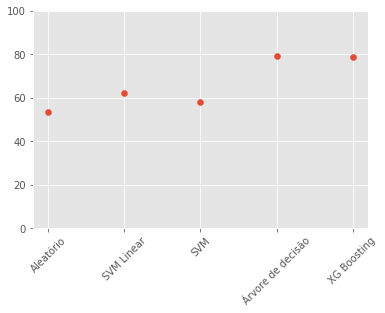

In [202]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

names = ['Aleatório', 'SVM Linear', 'SVM', 'Árvore de decisão', 'XG Boosting']

ax1 = plt.subplot()
ax1.set_ylim(0, 100)
ax1.set_xticklabels(names, rotation=45)
ax1.scatter(names, [acuracia_dummy, acuracia_linear,
                    acuracia_svm, acuracia_arvore, acuracia_boost])